In [2]:
#Importing Libraries:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Reading walkthroughs have been actioned in a separate notebook which has also been submitted - Please check through the uploaded notebook for evidence of step 2.

In [3]:
path = r'C:\Users\mojos\OneDrive\Career Foundry Course\Task4 - InstaCart Project'

In [4]:
ords_prods_custs = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_custs_merge.pkl'))

In [5]:
ords_prods_custs.head()

order_id  user_id eval_set  order_number  orders_day_of_week  \
0   2539329        1    prior             1                   2   
1   2398795        1    prior             2                   3   
2    473747        1    prior             3                   3   
3   2254736        1    prior             4                   4   
4    431534        1    prior             5                   4   

   order_hour_of_day  days_since_prior_order      first_order  product_id  \
0                  8                     NaN      First Order         196   
1                  7                    15.0  Repeat Customer         196   
2                 12                    21.0  Repeat Customer         196   
3                  7                    29.0  Repeat Customer         196   
4                 15                    28.0  Repeat Customer         196   

   add_to_cart_order  ...  First Name  Surnam  Gender    STATE  Age  \
0                  1  ...       Linda  Nguyen  Female  Alabama   31   
1                  1  ...       Linda  Nguyen  Female  Alabama   31   
2                  1  ...       Linda  Nguyen  Female  Alabama   31   
3                  1  ...       Linda  Nguyen  Female  Alabama   31   
4                  1  ...       Linda  Nguyen  Female  Alabama   31   

  date_joined n_dependants fam_status  income _merge  
0   2/17/2019            3    married   40423   both  
1   2/17/2019            3    married   40423   both  
2   2/17/2019            3    married   40423   both  
3   2/17/2019            3    married   40423   both  
4   2/17/2019            3    married   40423   both  

[5 rows x 34 columns]

### Step 3. Histogram generation on 'order_hour_of_day'

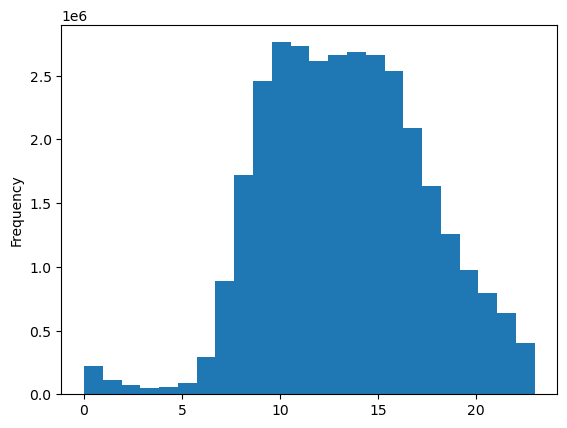

In [6]:
hist_hrs_of_day = ords_prods_custs['order_hour_of_day'].plot.hist(bins =24)

In [6]:
#Exporting Histogram
hist_hrs_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hrs_of_day.png'))

##### The visualization demonstrates that Instacart has a fairly steady volume of orders throughtout the average day - Generally speaking, there is 'normal' distribution for the 'hours of the day' frequency. The highest peaks are experienced between 10am and 4pm. The histogram is slightly skewed to the left, which makes sense as the hours between 0:00 and 7:00am are typically non-waking hours for the average person and it would be very unusual to see an influx during these periods.

### Step 4. Bar chart using 'loyalty_flag'

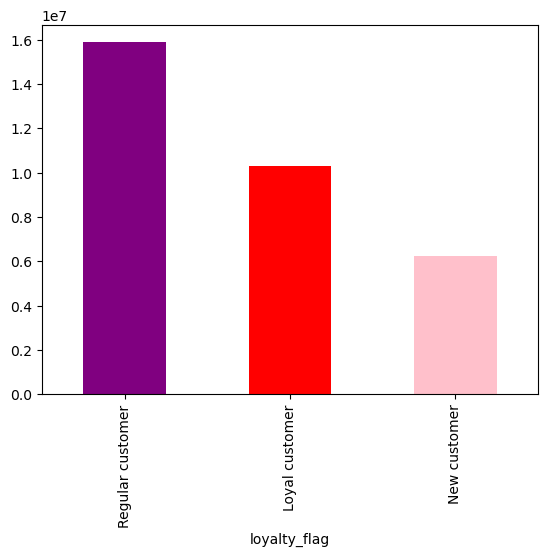

In [7]:
bar_loyalty = ords_prods_custs['loyalty_flag'].value_counts().plot.bar(color =['purple', 'red', 'pink'])

In [8]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

### Step 5. Sampling and prices / hour of day line chart

In [8]:
#Creating a new dataframe that houses the total per order and their hour of the week
df = ords_prods_custs.groupby('order_id').agg({'prices':'sum'})

In [9]:
df.columns

Index(['prices'], dtype='object')

In [10]:
df = df.reset_index()

In [11]:
df

order_id  prices
0               2    91.6
1               3    70.3
2               4    92.8
3               5   210.7
4               6    27.5
...           ...     ...
3214680   3421079     1.6
3214681   3421080    75.8
3214682   3421081    79.0
3214683   3421082    56.4
3214684   3421083    69.4

[3214685 rows x 2 columns]

In [12]:
# Creating a second set of data that contains order id and hour so that it can be merged with our prices sum subset.
df2 = ords_prods_custs[['order_id','order_hour_of_day']]

In [13]:
df2

order_id  order_hour_of_day
0          2539329                  8
1          2398795                  7
2           473747                 12
3          2254736                  7
4           431534                 15
...            ...                ...
32404854    156685                 23
32404855    484769                 11
32404856   1561557                 11
32404857    276317                 15
32404858   2922475                 12

[32404859 rows x 2 columns]

In [14]:
#we only need a list that has each order_id and their hour of creation once, so creating a dupe subset.
df2_dupes = df2.drop_duplicates('order_id')

In [15]:
df2.size

64809718

In [16]:
df2_dupes.size

6429370

In [17]:
df_merge = df.merge(df2_dupes,how='left',on = 'order_id')

In [18]:
#Random sampling generation

np.random.seed(4)

In [19]:
dev_agg = np.random.rand(len(df_merge)) <= 0.7

In [20]:
#Storing everything that is 'dev_agg' (or under 0.7 random value) from the agg DF - 70%

big_agg = df_merge[dev_agg]

In [21]:
small_agg = df_merge[~dev_agg]

In [22]:
#Validating output of sampling
len(df_merge)

3214685

In [23]:
len(big_agg) + len(small_agg)

3214685

In [24]:
#Creating a data set to perform the line chart on
sample_prices_hours = small_agg[['order_hour_of_day','prices']]

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


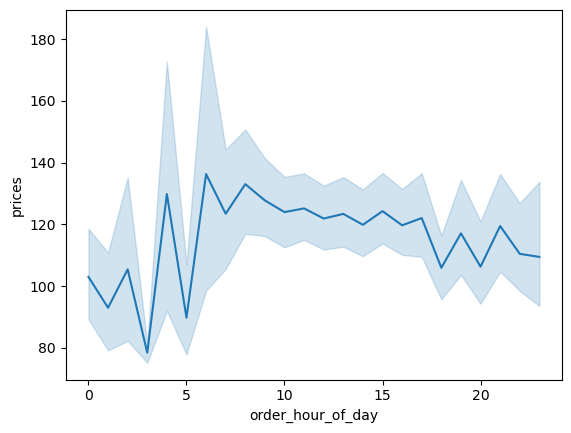

In [25]:
line_prices_hours = sns.lineplot(x='order_hour_of_day',y = 'prices',data = sample_prices_hours)

In [26]:
#Exporting line file

line_prices_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hours.png'))

### Sampling for the main dataset

In [27]:
#Random sampling generation

np.random.seed(4)

In [28]:
dev = np.random.rand(len(ords_prods_custs)) <= 0.7

In [29]:
#Storing everything that is 'dev' (or under 0.7 random value) from the main DF - 70%

big = ords_prods_custs[dev]

In [30]:
small = ords_prods_custs[~dev]

In [31]:
#Validation to ensure samples are the correct sizes
len(ords_prods_custs)

32404859

In [32]:
len(big) + len(small)

32404859

### Step 6. EDA customer demographics

In [33]:
sample_age_dependants = small[['Age','n_dependants']]

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


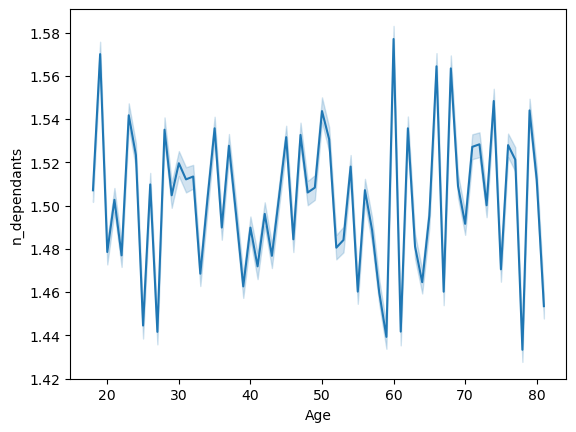

In [34]:
line_age_dependants = sns.lineplot(data = sample_age_dependants, x = 'Age',y = 'n_dependants')

##### The line chart doesn't unveil too many insights about a particular age group. All age groups appear to have a mean n. of dependants within 0.2 points of each other. Since there isn't much variance in the range, no one group appears to have a higher likelihood of having an inceased n. of dependants.
##### Surprisingly, the group which would typically have been expected to have more dependants e.g 30-50 years (parents who would be assumed to have children) have no higher a likelihood than other groupings.

In [35]:
#exporting line chart
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

### Step 7. Scatter charts showing age vs income.

In [36]:
#we've already generated the sample data so we can re-use the existing 'small' data set. we just need to call upon the necessary variables.
sample_age_income = small[['Age','income']]

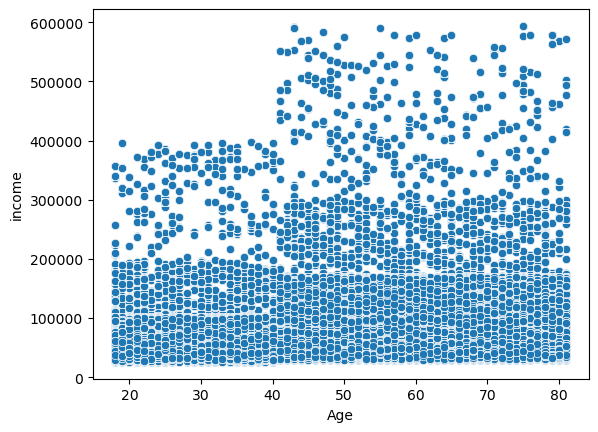

In [38]:
scatter_age_income = sns.scatterplot(data = sample_age_income, x = 'Age',y = 'income')

##### The scatterplot demonstrates that regardless of age, the bulk of the clients have and income of between 30-200k. The younger group, between 20 and 40 are capped at around 400k, and the frequency of customers whose income above 200k is significantly reduced. When looking at customers above 40 years old, the income ceiling increases to 600k, and their is a significant group of individuals that also make up the 200-300k range. 40+ year old Instacart customers are likely to have higher incomes.

In [51]:
sample_age_income.describe()

Age        income
count  9.721098e+06  9.721098e+06
mean   4.946128e+01  9.942981e+04
std    1.848547e+01  4.303434e+04
min    1.800000e+01  2.590300e+04
25%    3.300000e+01  6.700900e+04
50%    4.900000e+01  9.661800e+04
75%    6.500000e+01  1.278940e+05
max    8.100000e+01  5.939010e+05

In [52]:
#exporting scatterplot
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))